# Association Rules Movie

### Prepare rules for the all the data sets   1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values   2) Change the minimum length in apriori algorithm   3) Visulize the obtained rules using different plots 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
movie1 = pd.read_csv("C:\\Users\\User\\Documents\\Datascience_Assignments\\Assignment 9 (Assocaition Rules)\\my_movies.csv")
movie1.head(10)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
movie = movie1.drop(['V1','V2','V3','V4','V5'],axis=1)
movie.head(10)

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# Apriori Algorithm

### Support = 0.1

In [4]:
frequent_itemsets = apriori(movie, min_support = 0.1, use_colnames = False)
frequent_itemsets.head(10)

,support,itemsets
0,0.6,(0)
1,0.7,(1)
2,0.2,(2)
3,0.2,(3)
4,0.6,(4)
5,0.2,(5)
6,0.1,(6)
7,0.1,(7)
8,0.1,(8)
9,0.2,(9)


In [5]:
data = association_rules(frequent_itemsets, metric = 'lift' ,min_threshold = 0.8)
data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(0),(2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(2),(0),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(0),(3),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
241,(0),"(9, 2, 3, 5)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
242,(2),"(0, 9, 3, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(3),"(0, 9, 2, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(5),"(0, 9, 2, 3)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [6]:
data[data.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(0),(4),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(4),(0),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(0),(7),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
241,(0),"(9, 2, 3, 5)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
242,(2),"(0, 9, 3, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(3),"(0, 9, 2, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(5),"(0, 9, 2, 3)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [7]:
data.sort_values('lift',ascending = False)[:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
206,"(9, 2)","(3, 5)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
211,"(3, 5)","(9, 2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
221,"(0, 2, 3)","(9, 5)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
139,"(1, 9)","(0, 7)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
138,"(0, 7)","(1, 9)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
5,(3),(0),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
62,"(2, 5)",(0),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(0),(3),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(2),(0),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80


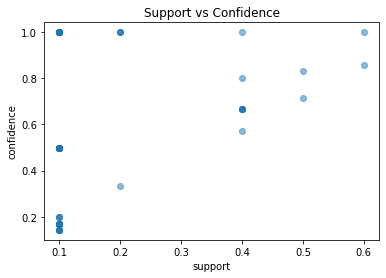

In [8]:
plt.scatter(data['support'], data['confidence'], alpha = 0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

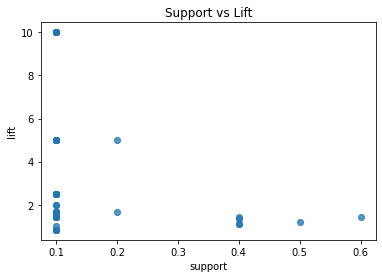

In [9]:
plt.scatter(data['support'], data['lift'], alpha = 0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

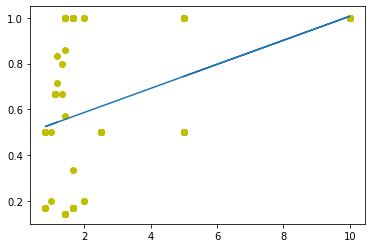

In [10]:
fit = np.polyfit(data['lift'], data['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(data['lift'], data['confidence'], 'yo', data['lift'], 
 fit_fn(data['lift']))

### Support = 0.2

In [11]:
frequent_itemsets1 = apriori(movie, min_support = 0.2, use_colnames = True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [12]:
data1 = association_rules(frequent_itemsets1, metric = 'lift' ,min_threshold = 0.8)
data1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [13]:
data1[data1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


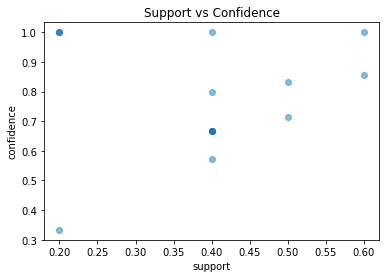

In [14]:
plt.scatter(data1['support'], data1['confidence'], alpha = 0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

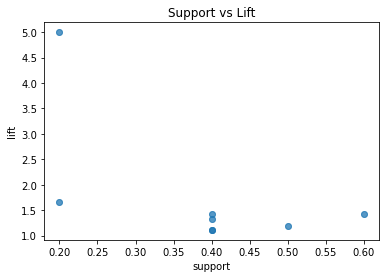

In [15]:
plt.scatter(data1['support'], data1['lift'], alpha = 0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

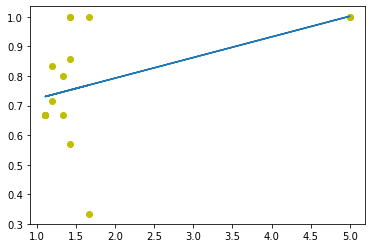

In [16]:
fit = np.polyfit(data1['lift'], data1['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(data1['lift'], data1['confidence'], 'yo', data1['lift'], 
 fit_fn(data1['lift']))

### Support = 0.4 

In [17]:
frequent_itemsets2 = apriori(movie, min_support = 0.4, use_colnames = True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Patriot, Gladiator)"
6,0.4,"(Sixth Sense, Patriot, Gladiator)"


In [18]:
data2 = association_rules(frequent_itemsets2, metric = 'lift' ,min_threshold = 0.8)
data2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [19]:
data2[data2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


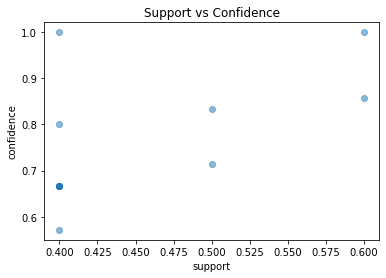

In [20]:
plt.scatter(data2['support'], data2['confidence'], alpha = 0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

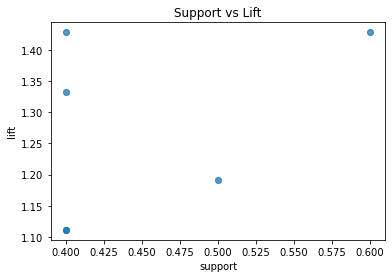

In [21]:
plt.scatter(data2['support'], data2['lift'], alpha = 0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

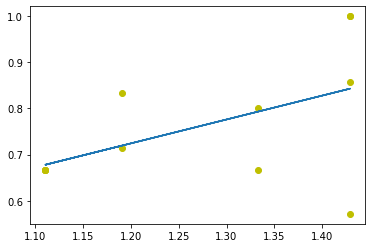

In [22]:
fit = np.polyfit(data2['lift'], data2['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(data2['lift'], data2['confidence'], 'yo', data2['lift'], 
 fit_fn(data2['lift']))

### Support = 0.5 

In [23]:
frequent_itemsets3 = apriori(movie, min_support = 0.5, use_colnames = True)
frequent_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.6,"(Patriot, Gladiator)"


In [24]:
data3 = association_rules(frequent_itemsets3, metric = 'lift' ,min_threshold = 0.8)
data3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


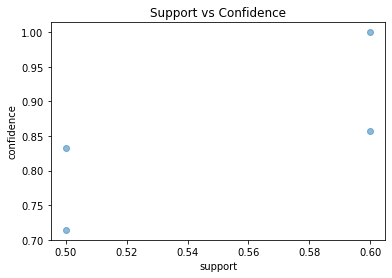

In [25]:
plt.scatter(data3['support'], data3['confidence'], alpha = 0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

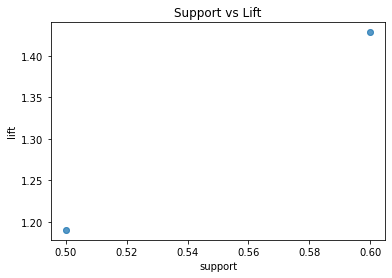

In [26]:
plt.scatter(data3['support'], data3['lift'], alpha = 0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

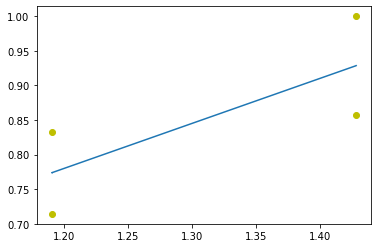

In [27]:
fit = np.polyfit(data3['lift'], data3['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(data3['lift'], data3['confidence'], 'yo', data3['lift'], 
 fit_fn(data3['lift']))

## Visualization of rules using different plots 

C:\Users\User\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1128: RuntimeWarning: invalid value encountered in double_scalars
  notch_min = med - 1.57 * iqr / np.sqrt(N)


<AxesSubplot:>

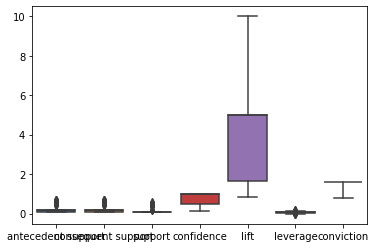

In [28]:
sns.boxplot(data = data)

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

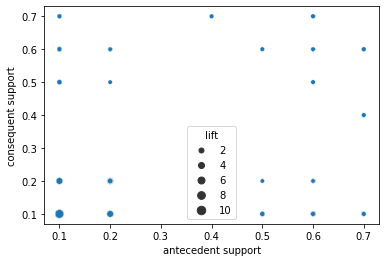

In [29]:
sns.scatterplot(x = 'antecedent support',y = 'consequent support',size = 'lift',data = data)

<AxesSubplot:xlabel='support', ylabel='confidence'>

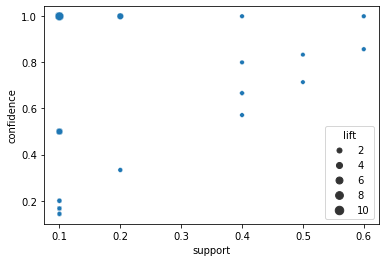

In [30]:
sns.scatterplot(x = 'support',y = 'confidence',size = 'lift',data = data)

<AxesSubplot:xlabel='lift', ylabel='leverage'>

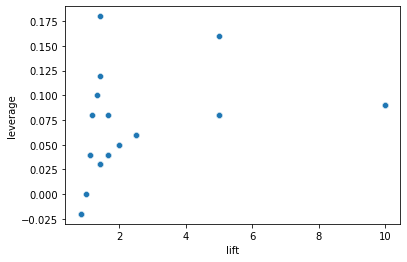

In [31]:
sns.scatterplot(x = 'lift',y = 'leverage',data = data)

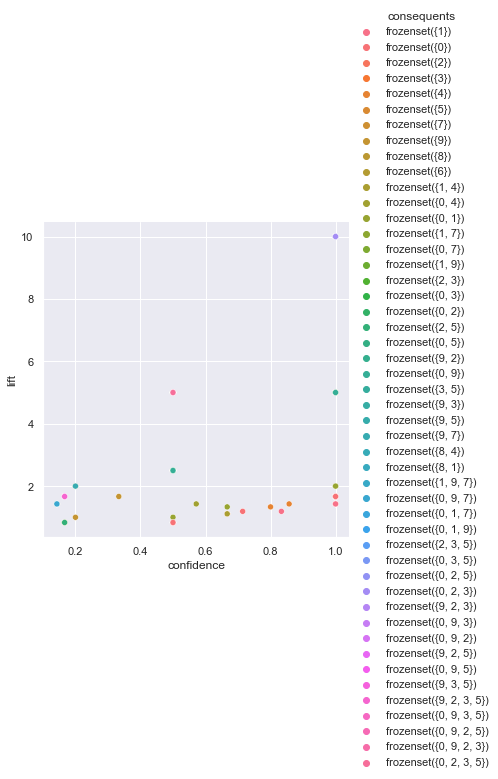

In [32]:
sns.set(style = "darkgrid")            
sns.relplot(x = "confidence", y = "lift",hue = 'consequents', data = data)

<AxesSubplot:xlabel='confidence', ylabel='lift'>

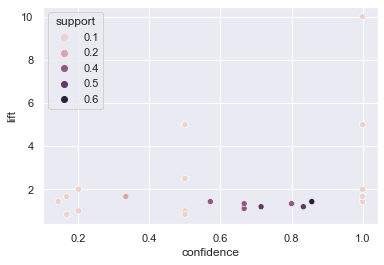

In [33]:
sns.scatterplot(x = 'confidence',y = 'lift',hue = 'support',data = data)

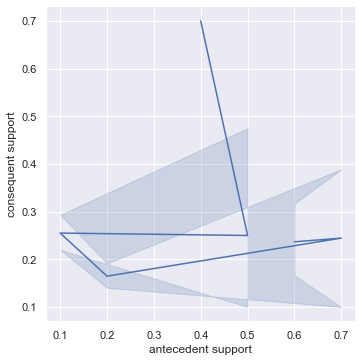

In [34]:
sns.relplot(x = "antecedent support", y = "consequent support", kind = "line",sort = False, data = data)

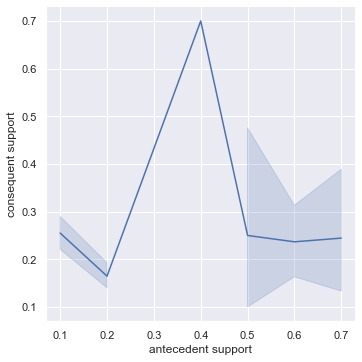

In [35]:
sns.relplot(x = "antecedent support", y = "consequent support", kind = "line", data = data)


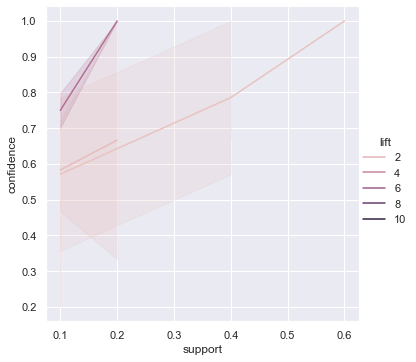

In [36]:
sns.relplot(x = "support", y = "confidence",hue = 'lift', kind = "line", data = data)


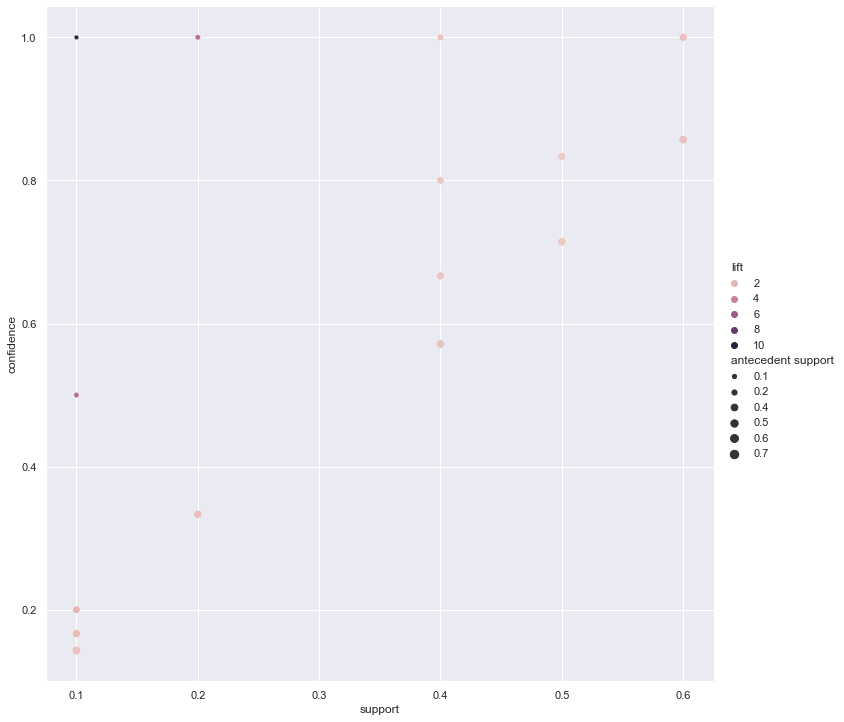

In [37]:
sns.relplot(x = 'support',y = 'confidence',hue = 'lift',size = 'antecedent support',height = 10,data = data)

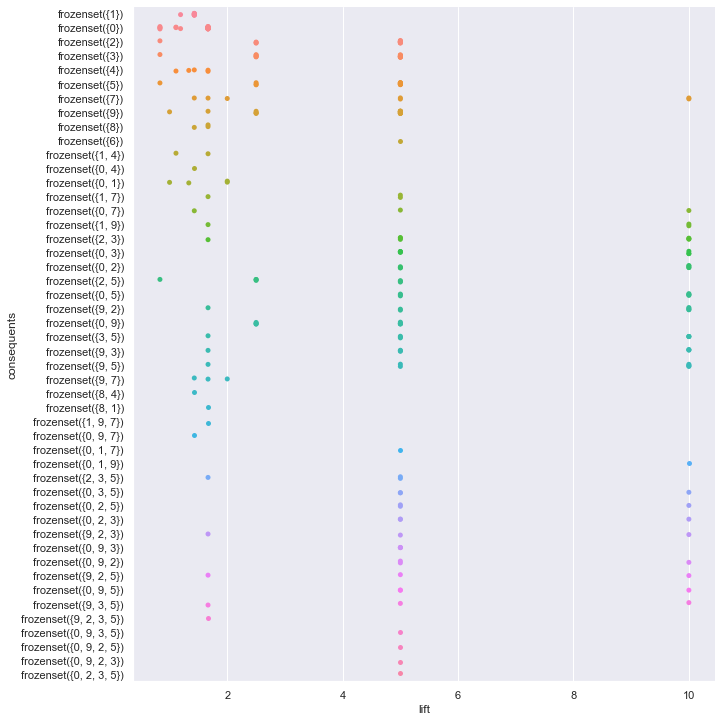

In [38]:
sns.catplot(x = "lift",y = "consequents",height = 10,data = data)

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.0% of the points cann

<AxesSubplot:xlabel='lift', ylabel='consequents'>

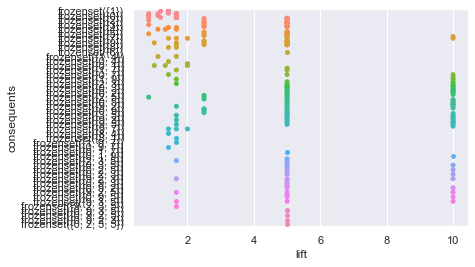

In [39]:
sns.swarmplot(x = "lift",y = "consequents", data = data)

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cann

<AxesSubplot:xlabel='confidence', ylabel='consequents'>

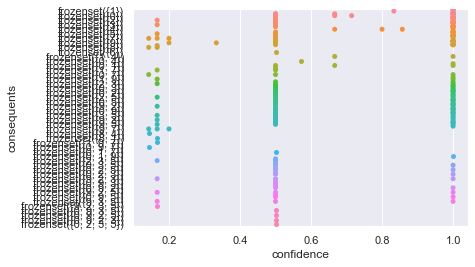

In [40]:
sns.swarmplot(x="confidence",y="consequents" ,data=data)

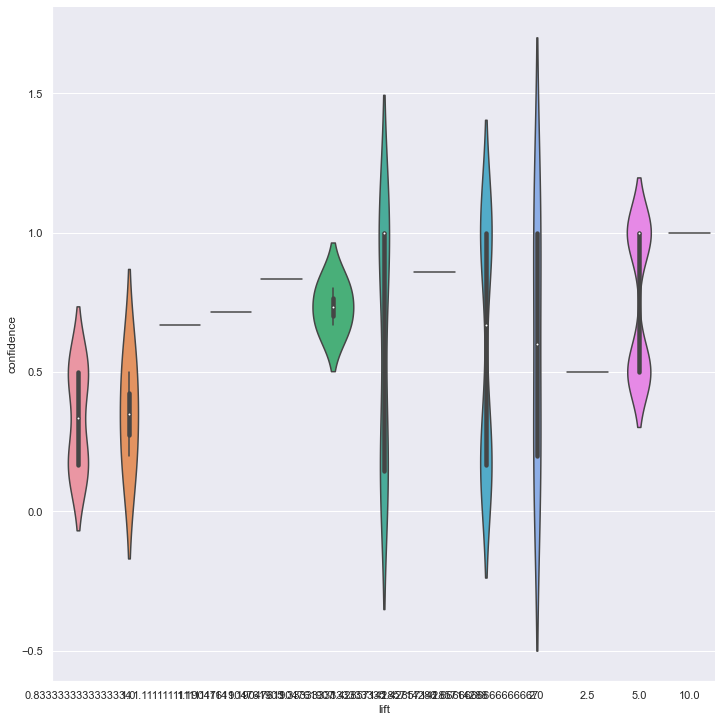

In [41]:
sns.catplot(x = "lift",y = "confidence",kind = 'violin',height = 10,data = data)

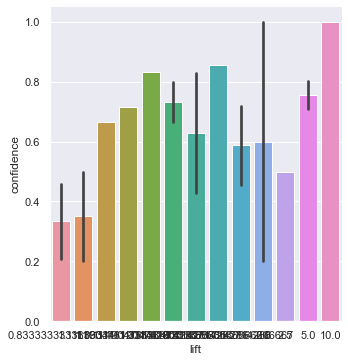

In [42]:
sns.catplot(x = "lift",y = "confidence",kind = 'bar',data = data)

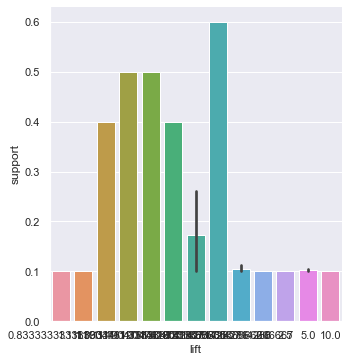

In [43]:
sns.catplot(x = "lift",y = "support",kind = 'bar',data = data)

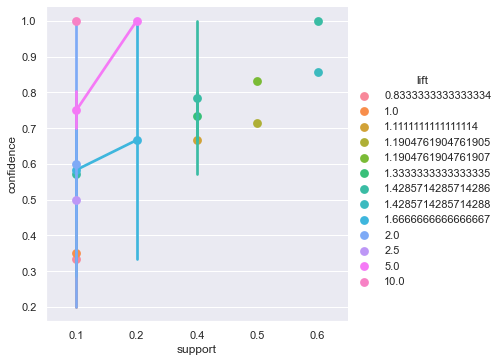

In [44]:
sns.catplot(x = 'support',y = 'confidence',hue = 'lift',kind = 'point',data = data)

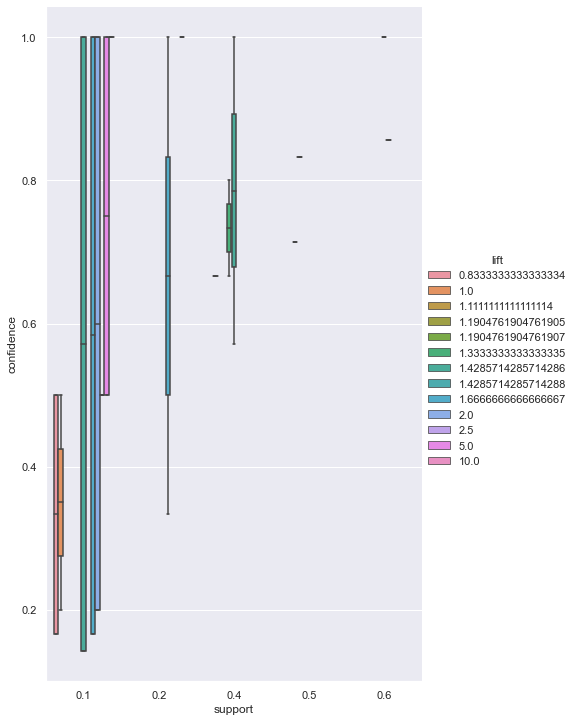

In [45]:
sns.catplot(x = "support", y = "confidence", hue = "lift",
          aspect = 0.6,height = 10,
            kind = "box", data = data);